In [1]:
import numpy as np
import pandas as pd
#pd.set_option('precision', 5)

In [10]:
# sqrt(x) - cos(0.1*x), x = [0, 2]
def f(x):
    return np.sqrt(x) - np.cos(0.1 * x) #if x >= 0 and x <= 2 else None

In [11]:
f(0), f(2), f(3)

(-1.0, 0.4341469845318535, 0.7767143184432712)

In [12]:
def frag(a, b, n):
    d = (b - a) / n # step
    arr = [a]
    for i in range(n-1):
        #arr.append(round(arr[i] + d, 3))
        arr.append(arr[i] + d)
    arr.append(b)
    return arr

In [13]:
n = 10
a = 0
b = 2
x = frag(a, b, n)
x

[0,
 0.2,
 0.4,
 0.6000000000000001,
 0.8,
 1.0,
 1.2,
 1.4,
 1.5999999999999999,
 1.7999999999999998,
 2]

In [14]:
def calc(arr):
    y = []
    for value in arr:
        y.append(f(value))
    return y
y = calc(x)

In [15]:
y

[-1.0,
 -0.5525864111666199,
 -0.36674457462730203,
 -0.22360387069372079,
 -0.10237451530270347,
 0.0049958347219741794,
 0.1026364791564659,
 0.19299996040728595,
 0.27768378069172484,
 0.3577970937117524,
 0.4341469845318535]

In [16]:
def l(x, pX, pY):
    ans = 0
    n = len(pY)
    for i in range(n):
        koef = 1
        for j in range(n):
            if i != j:
                koef = koef * (x - pX[j]) / (pX[i] - pX[j])
        ans += pY[i] * koef
        
    return ans

In [17]:
m = 4 * n
newX = frag(a, b, m)
res = []
for i in range(m+1):
    xx = newX[i] 
    res.append([xx, f(xx), l(xx, x, y)])


In [18]:
res

[[0, -1.0, -1.0],
 [0.05, -0.7763807022760627, -0.8254011280076484],
 [0.1, -0.6837222343998273, -0.7053850683399873],
 [0.15000000000000002, -0.6125891674886175, -0.6189297003698999],
 [0.2, -0.5525864111666199, -0.5525864111666199],
 [0.25, -0.4996875162757026, -0.4980742722784289],
 [0.3, -0.45182747624382147, -0.45052226750264285],
 [0.35, -0.407779584213527, -0.4072179699416944],
 [0.39999999999999997, -0.36674457462730203, -0.3667445746273023],
 [0.44999999999999996, -0.32816727759790554, -0.3284090647444906],
 [0.49999999999999994, -0.2916434792084188, -0.2918826748870939],
 [0.5499999999999999, -0.25686803252803225, -0.2569908637099503],
 [0.6, -0.22360387069372079, -0.22360387069372073],
 [0.65, -0.1916624688414461, -0.1915907573897409],
 [0.7000000000000001, -0.16089097371920402, -0.16080977234802124],
 [0.7500000000000001, -0.1311634143277688, -0.1311160808350301],
 [0.8000000000000002, -0.10237451530270336, -0.10237451530270336],
 [0.8500000000000002, -0.07443522877300157, 

In [19]:
mydf = pd.DataFrame(res, columns=['x', 'f(x)', 'l(x)'], index=range(m+1))
mydf


,x,f(x),l(x)
0,0.00,-1.000000,-1.000000
1,0.05,-0.776381,-0.825401
2,0.10,-0.683722,-0.705385
3,0.15,-0.612589,-0.618930
4,0.20,-0.552586,-0.552586
5,0.25,-0.499688,-0.498074
6,0.30,-0.451827,-0.450522
7,0.35,-0.407780,-0.407218
8,0.40,-0.366745,-0.366745
9,0.45,-0.328167,-0.328409


In [28]:
import scipy.interpolate
x, y

([0,
  0.2,
  0.4,
  0.6000000000000001,
  0.8,
  1.0,
  1.2,
  1.4,
  1.5999999999999999,
  1.7999999999999998,
  2],
 [-1.0,
  -0.5525864111666199,
  -0.36674457462730203,
  -0.22360387069372079,
  -0.10237451530270347,
  0.0049958347219741794,
  0.1026364791564659,
  0.19299996040728595,
  0.27768378069172484,
  0.3577970937117524,
  0.4341469845318535])

In [21]:
lg = scipy.interpolate.lagrange(x, y)
lg(1), l(1, x, y), f(1)

(0.004995834719319525, 0.0049958347219741794, 0.0049958347219741794)

In [29]:
newX = np.array(newX)
vfunc = np.vectorize(lg)
vfunc(newX)
dat2 = pd.DataFrame(vfunc(newX), columns=['lagrange'], index=range(m+1))
mydf.join(dat2)

array([-1.        , -0.82540113, -0.70538507, -0.6189297 , -0.55258641,
       -0.49807427, -0.45052227, -0.40721797, -0.36674457, -0.32840906,
       -0.29188267, -0.25699086, -0.22360387, -0.19159076, -0.16080977,
       -0.13111608, -0.10237452, -0.07447018, -0.04731364, -0.02084014,
        0.00499583,  0.03022855,  0.05488918,  0.07901186,  0.10263648,
        0.12580738,  0.14856878,  0.17095817,  0.19299996,  0.21470199,
        0.23605722,  0.25705244,  0.27768378,  0.2979768 ,  0.31800468,
        0.33789348,  0.35779709,  0.37781622,  0.39782661,  0.41716987,
        0.43414698])

In [23]:
#X = [1, 3, 4]
#Y = [6, 24, 45]
def difff(xP, yP):
    ans = 0
    n = len(xP)
    koef = 1
    for i in range(n):
        for j in range(n):
            if i != j:
                koef *= xP[i] - xP[j]
        ans += yP[i] / koef
        koef = 1
    return ans
#difff(X, Y)

In [24]:
def P(x, xP, yP):
    ans = yP[0]
    koef = 1
    for i in range(n):
        koef *= x - xP[i]
        dif = difff(xP[:i+2], yP[:i+2])
        ans += dif * koef
    return ans

In [25]:
bynewton = [P(value, x, y) for value in newX]
mydf['lagrange'] = vfunc(newX)
mydf['newton'] = bynewton
mydf

,x,f(x),l(x),lagrange,newton
0,0.00,-1.000000,-1.000000,-1.000000,-1.000000
1,0.05,-0.776381,-0.825401,-0.825401,-0.825401
2,0.10,-0.683722,-0.705385,-0.705385,-0.705385
3,0.15,-0.612589,-0.618930,-0.618930,-0.618930
4,0.20,-0.552586,-0.552586,-0.552586,-0.552586
5,0.25,-0.499688,-0.498074,-0.498074,-0.498074
6,0.30,-0.451827,-0.450522,-0.450522,-0.450522
7,0.35,-0.407780,-0.407218,-0.407218,-0.407218
8,0.40,-0.366745,-0.366745,-0.366745,-0.366745
9,0.45,-0.328167,-0.328409,-0.328409,-0.328409


In [18]:
mydf

,x,f(x),l(x),lagrange,newton
0,0.00,-1.000000,-1.000000,-1.000000,-1.000000
1,0.05,-0.776381,-0.825401,-0.825401,-0.825401
2,0.10,-0.683722,-0.705385,-0.705385,-0.705385
3,0.15,-0.612589,-0.618930,-0.618930,-0.618930
4,0.20,-0.552586,-0.552586,-0.552586,-0.552586
5,0.25,-0.499688,-0.498074,-0.498074,-0.498074
6,0.30,-0.451827,-0.450522,-0.450522,-0.450522
7,0.35,-0.407780,-0.407218,-0.407218,-0.407218
8,0.40,-0.366745,-0.366745,-0.366745,-0.366745
9,0.45,-0.328167,-0.328409,-0.328409,-0.328409


<IPython.core.display.Javascript object>


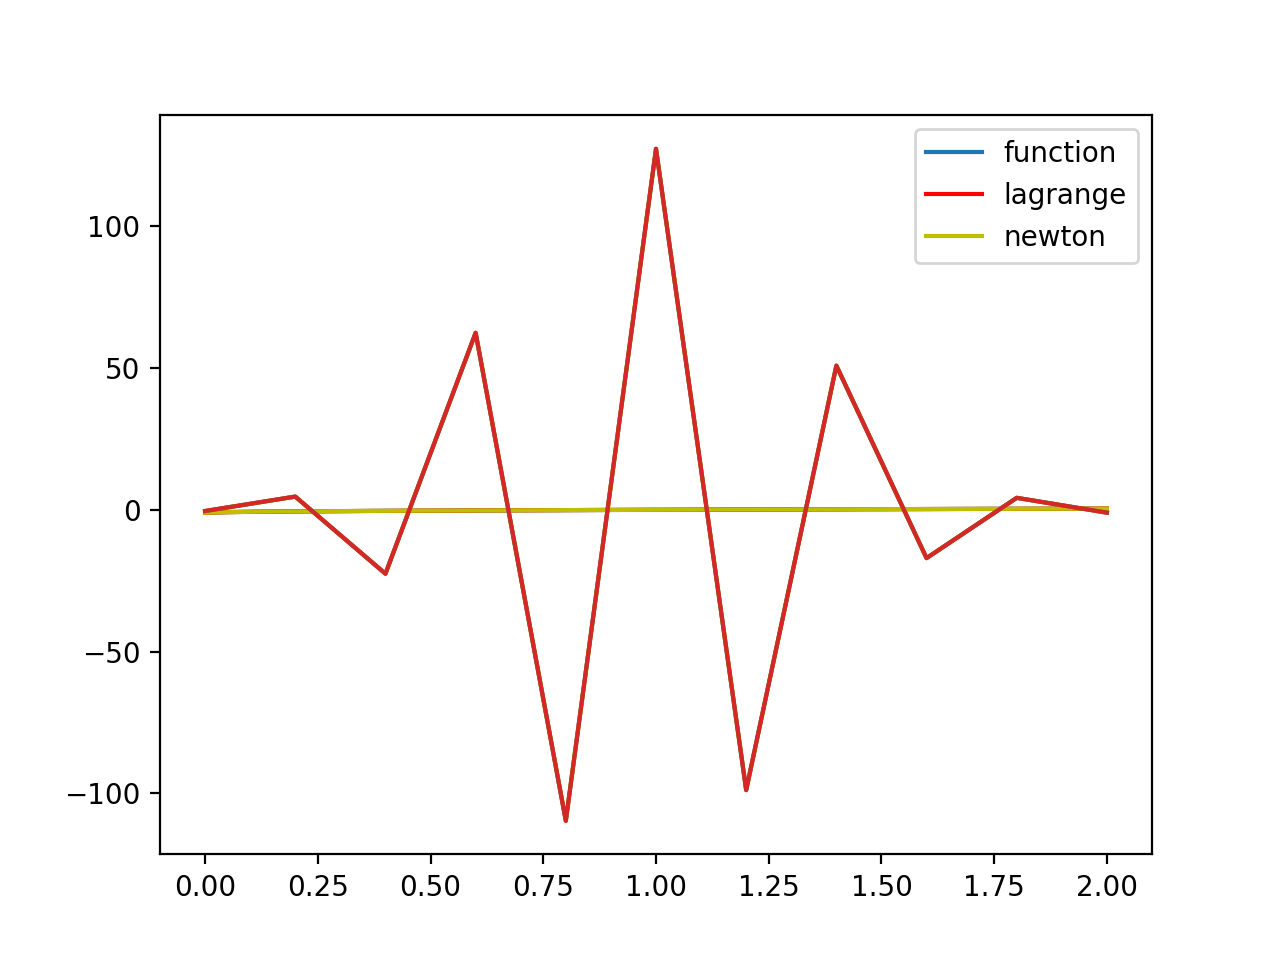

In [33]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(mydf['x'], mydf['f(x)'], label='function')
plt.plot(mydf['x'], mydf['l(x)'], 'r', label='lagrange')
plt.plot(mydf['x'], mydf['newton'], 'y', label='newton')
plt.legend()
plt.show()

In [36]:
plt.plot(x, scipy.interpolate.lagrange(x, y))
type(scipy.interpolate.lagrange(x, y))

numpy.poly1d